Class
Malicioux    22929
Name: count, dtype: int64
Class
Malicioux    22929
Name: count, dtype: int64
Class
Benin    24249
Name: count, dtype: int64
(47178, 36)
Class
Benin        24249
Malicioux    22929
Name: count, dtype: int64
Feature: Unnamed: 34 , Gain: 0.999435232065634
Feature: char_distribution , Gain: 0.9981121287264805
Feature: Registrant_Name , Gain: 0.9962878913792471
Feature: Domain_Name , Gain: 0.9675384438303876
Feature: distance_from_bad_words , Gain: 0.9592370549624051
Feature: Creation_Date_Time , Gain: 0.9582228830261231
Feature: sld , Gain: 0.953945665568402
Feature: 1gram , Gain: 0.953945665568402
Feature: 2gram , Gain: 0.9525163159476628
Feature: 3gram , Gain: 0.9433119263443017


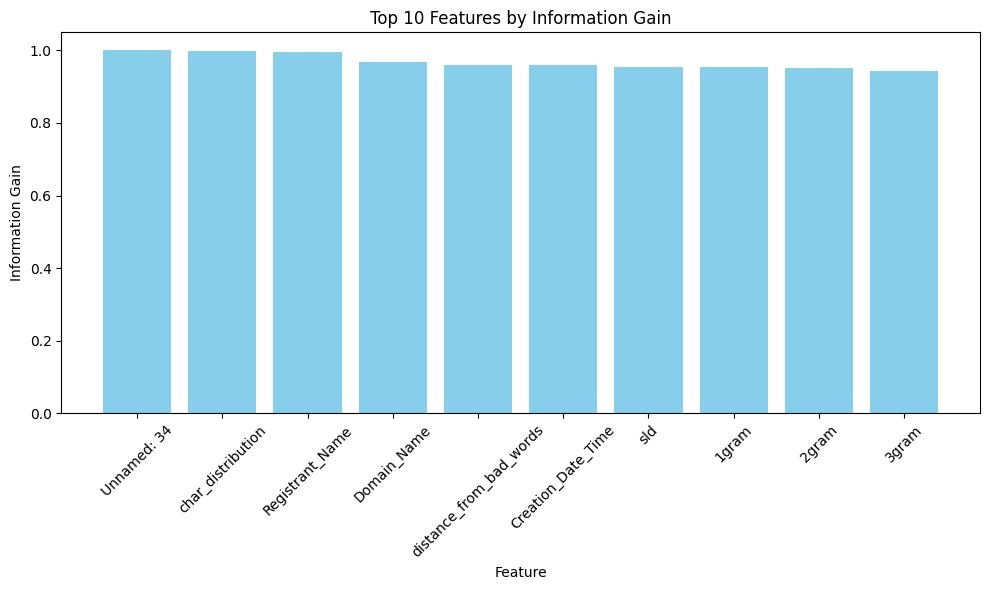

In [3]:

import pandas as pd
from math import log

def entropy(class_probabilities):
    """Calculates the entropy of a list of class probabilities."""
    return sum(-p * log(p, 2) for p in class_probabilities if p)

def information_gain(data, feature_name, classes):
    total_entropy = entropy([len(data[data['Class'] == c]) / len(data) for c in classes])
    values = data[feature_name].unique()
    weighted_entropy = 0.0

    for v in values:
        subset_length = len(data[data[feature_name] == v])
        if subset_length == 0:
            continue  # Skip this value if subset length is zero to avoid division by zero
        subset_entropy = entropy([len(data[(data[feature_name] == v) & (data['Class'] == c)]) / subset_length for c in classes])
        weighted_entropy += (subset_length / len(data)) * subset_entropy
    
    return total_entropy - weighted_entropy


def calculate_information_gains(data, classes):
    information_gains = []
    
    for feature_name in data.columns[:-1]:  # Exclude the last column which is the target variable
        gain = information_gain(data, feature_name, classes)
        information_gains.append((feature_name, gain))
    
    return information_gains



def select_top_features(data, classes, top_n=10):
    information_gains = calculate_information_gains(data, classes)
    top_features = sorted(information_gains, key=lambda x: x[1], reverse=True)[:top_n]
    return top_features





##### deuxieme papier  equilibrage non  aleatoire #####

##### deuxieme papier  equilibrage aleatoire #####

# Chargement des fichiers CSV
benin_data = pd.read_csv("../data/Bell_DNS Dataset/features_domain_benign_csv.csv")
malware_data = pd.read_csv("../data/Bell_DNS Dataset/features-domain_Malware.csv")
phishing_data = pd.read_csv("../data/Bell_DNS Dataset/features-domain_phishing.csv")
spam_data = pd.read_csv("../data/Bell_DNS Dataset/features-domain_Spam.csv")

# Ajout de la colonne 'Class'
benin_data['Class'] = 'Benin'


# Prélèvement d'échantillons pour l'ensemble équilibré
spam_data = spam_data.sample(7643, random_state=42,replace=True)
malware_data = malware_data.sample(7643, random_state=42)
phishing_data = phishing_data.sample(7643, random_state=42)

balanced_samples_malicioux = pd.concat([spam_data, malware_data, phishing_data], ignore_index=True)
# balanced_benign = benin_data.sample(23716, random_state=42)
balanced_samples_malicioux['Class'] = 'Malicioux'
print(balanced_samples_malicioux['Class'].value_counts())
# balanced_samples_malicioux = balanced_samples_malicioux.sample(22929, random_state=42)
print(balanced_samples_malicioux['Class'].value_counts())
print(benin_data['Class'].value_counts())


####### Concatenations des deux jeu de donnee ############

data = pd.concat([balanced_samples_malicioux,benin_data], ignore_index=True)
print(data.shape)
print(data['Class'].value_counts())


# Spécifier la colonne cible
classes = data['Class'].unique()

# Calcul du gain d'information pour chaque caractéristique
# information_gains = calculate_information_gains(data, classes)

# Afficher les gains d'information pour chaque caractéristique
# for feature_name, gain in information_gains:
    # print("Information Gain for feature", feature_name, ":", gain)




import matplotlib.pyplot as plt

# pour ne pas executer le meme code pluisieur fois a il faut commenter la ligne si dans la section precedente
# information_gains = calculate_information_gains(data, classes)


# Sélectionner les 10 meilleures caractéristiques
top_features = select_top_features(data, classes)

# Afficher les noms et les gains des 10 meilleures caractéristiques
for feature_name, gain in top_features:
    print("Feature:", feature_name, ", Gain:", gain)

# Tracer les gains d'information des 10 meilleures caractéristiques
top_feature_names = [feature_name for feature_name, _ in top_features]
top_feature_gains = [gain for _, gain in top_features]

plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_gains, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.title('Top 10 Features by Information Gain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature: Unnamed: 34 , Gain: 193.67132857607444
Feature: Registrant_Name , Gain: 2.9950103921489535
Feature: Page_Rank , Gain: 0.9767807700183493
Feature: shortened , Gain: 0.30289459794754836
Feature: obfuscate_at_sign , Gain: 0.29949206451746113
Feature: Country , Gain: 0.1609771861944348
Feature: Organization , Gain: 0.15177247689673906
Feature: State , Gain: 0.13760845588999648
Feature: puny_coded , Gain: 0.10674029971435296
Feature: Emails , Gain: 0.10380319022792588


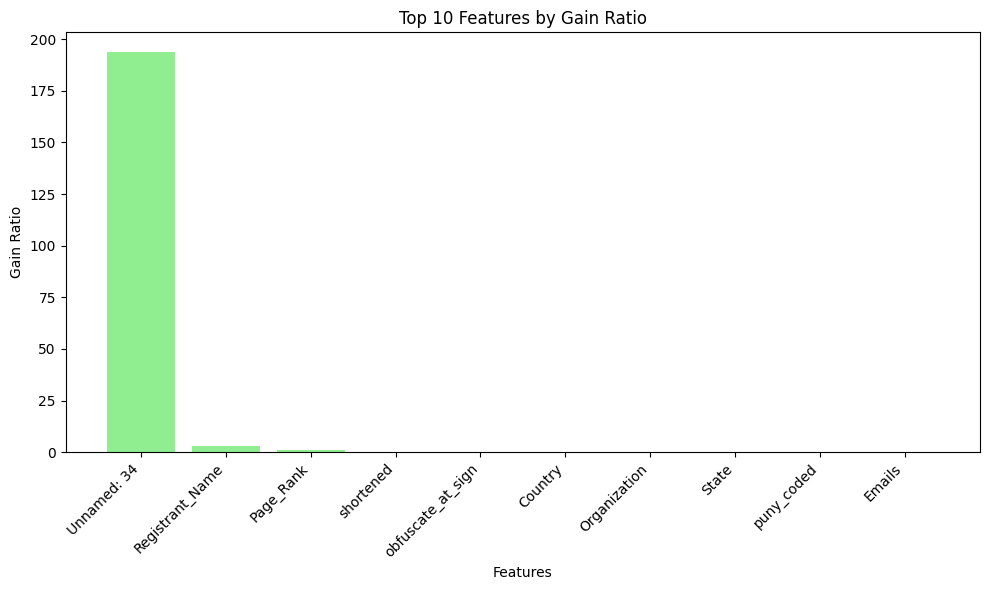

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

def entropy(class_probabilities):
    """Calculates the entropy of a list of class probabilities."""
    return sum(-p * log(p, 2) for p in class_probabilities if p)

def information_gain(data, feature_name, classes):
    total_entropy = entropy([len(data[data['Class'] == c]) / len(data) for c in classes])
    values = data[feature_name].unique()
    weighted_entropy = 0.0

    for v in values:
        subset_length = len(data[data[feature_name] == v])
        if subset_length == 0:
            continue  # Skip this value if subset length is zero to avoid division by zero
        subset_entropy = entropy([len(data[(data[feature_name] == v) & (data['Class'] == c)]) / subset_length for c in classes])
        weighted_entropy += (subset_length / len(data)) * subset_entropy
    
    return total_entropy - weighted_entropy

def calculate_information_gains(data, classes):
    information_gains = []
    
    for feature_name in data.columns[:-1]:  # Exclude the last column which is the target variable
        gain = information_gain(data, feature_name, classes)
        information_gains.append((feature_name, gain))
    
    return information_gains

def gain_ratio(data, feature_name, classes):
    gain = information_gain(data, feature_name, classes)
    iv = intrinsic_value(data, feature_name)
    if iv == 0:  # Avoid division by zero
        return 0
    return gain / iv

def intrinsic_value(data, feature_name):
    values = data[feature_name].unique()
    iv = sum(-(len(data[data[feature_name] == v]) / len(data)) * log(len(data[data[feature_name] == v]) / len(data), 2) for v in values if len(data[data[feature_name] == v]) > 0)
    return iv

def select_top_features_with_gain_ratio(data, classes, top_n=10):
    gain_ratios = [(feature_name, gain_ratio(data, feature_name, classes)) for feature_name in data.columns[:-1]]
    top_features = sorted(gain_ratios, key=lambda x: x[1], reverse=True)[:top_n]
    return top_features

def plot_top_features_gain_ratio(top_features, feature_names):
    top_feature_names = [feature_name for feature_name, _ in top_features]
    top_feature_ratios = [ratio for _, ratio in top_features]

    plt.figure(figsize=(10, 6))
    plt.bar(top_feature_names, top_feature_ratios, color='lightgreen')
    plt.xlabel('Features')
    plt.ylabel('Gain Ratio')
    plt.title('Top 10 Features by Gain Ratio')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Chargement des fichiers CSV
# data = pd.read_csv("je charge_deja _les_donnees_depuis_gain_information.csv")

# Spécifier la colonne cible
classes = data['Class'].unique()

# Sélectionner les 10 meilleures caractéristiques avec le ratio de gain
top_features_gain_ratio = select_top_features_with_gain_ratio(data, classes)

# Afficher les noms et les gains des 10 meilleures caractéristiques
for feature_name, gain in top_features_gain_ratio:
    print("Feature:", feature_name, ", Gain:", gain)

# Tracer les 10 meilleures caractéristiques avec le gain ratio
plot_top_features_gain_ratio(top_features_gain_ratio, data.columns[:-1])


Top 10 Features with Gini Index:
Feature: Unnamed: 34 , Gini Index: 0.0
Feature: char_distribution , Gini Index: 0.0006117842948569135
Feature: Registrant_Name , Gini Index: 0.0014888485386948033
Feature: Domain_Name , Gini Index: 0.013219950710886398
Feature: distance_from_bad_words , Gini Index: 0.017430073227378325
Feature: Creation_Date_Time , Gini Index: 0.017451395947523072
Feature: sld , Gini Index: 0.019680569535578597
Feature: 1gram , Gini Index: 0.019680569535578597
Feature: 2gram , Gini Index: 0.020412352257645434
Feature: 3gram , Gini Index: 0.024909633859745817


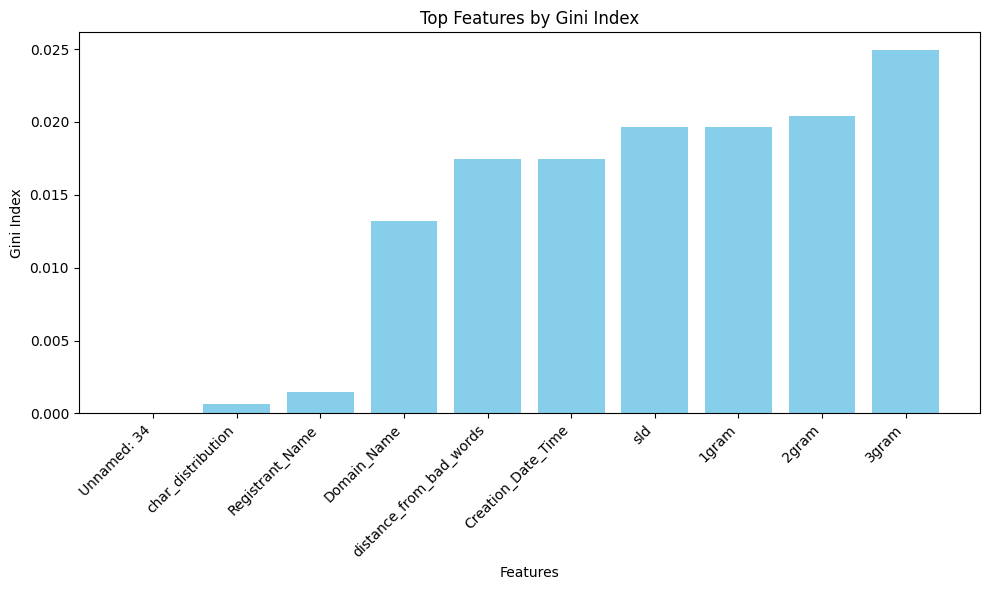

In [5]:
##### Dans ce cas plus la Gini est proche de Zeros plus plus le features est important cas il est pur (ie bon pour la sepration ) ##


import pandas as pd
import matplotlib.pyplot as plt

# Fonctions pour calculer le Gini Index
def gini_index(data, feature_name, classes):
    """Calculates the Gini index for a specific feature."""
    total_instances = len(data)
    values = data[feature_name].unique()
    gini_index_feature = 0.0

    for value in values:
        subset = data[data[feature_name] == value]
        probability = len(subset) / total_instances
        gini_index_feature += probability * gini(subset, classes)

    return gini_index_feature

def gini(data, classes):
    """Calculates the Gini index for a subset of data."""
    total_instances = len(data)
    gini_index_subset = 1.0

    for c in classes:
        num_instances_in_class = len(data[data['Class'] == c])
        if num_instances_in_class == 0:
            continue
        probability = num_instances_in_class / total_instances
        gini_index_subset -= probability ** 2

    return gini_index_subset

def select_top_features_with_gini_index(data, classes, top_n=10):
    gini_indices = [(feature_name, gini_index(data, feature_name, classes)) for feature_name in data.columns[:-1]]
    top_features = sorted(gini_indices, key=lambda x: x[1])[:top_n]
    return top_features


# Chargement des données à partir de votre DataFrame
# data = pd.read_csv("je charge_deja _les_donnees_depuis_gain_information.csv")

# Spécifier la colonne cible
classes = data['Class'].unique()

# Sélectionner les 10 meilleures caractéristiques avec le Gini Index
top_features_gini_index = select_top_features_with_gini_index(data, classes)

# Afficher les noms et les indices de Gini des 10 meilleures caractéristiques
print("Top 10 Features with Gini Index:")
for feature_name, gini_value in top_features_gini_index:
    print("Feature:", feature_name, ", Gini Index:", gini_value)

# Tracer les 10 meilleures caractéristiques avec le Gini Index
def plot_top_features_gini_index(top_features, feature_names):
    top_feature_names = [feature_name for feature_name, _ in top_features]
    top_feature_gini = [gini_value for _, gini_value in top_features]

    plt.figure(figsize=(10, 6))
    colors = ['skyblue' if gini_value > 0 else 'red' for gini_value in top_feature_gini]  # Couleur spéciale pour les Gini Index de zéro
    plt.bar(top_feature_names, top_feature_gini, color=colors)
    plt.xlabel('Features')
    plt.ylabel('Gini Index')
    plt.title('Top Features by Gini Index')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Tracer les 10 meilleures caractéristiques avec le Gini Index
plot_top_features_gini_index(top_features_gini_index, data.columns[:-1])


c:\python install\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\python install\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top 10 Features by Pearson Correlation:
Feature: entropy, Pearson Correlation: 0.3210936294035876
Feature: len, Pearson Correlation: 0.3022288890495591
Feature: numeric_percentage, Pearson Correlation: 0.21041944990459524
Feature: puny_coded, Pearson Correlation: 0.08637264694763615
Feature: dec_32, Pearson Correlation: 0.017162143385919162
Feature: oc_32, Pearson Correlation: 0.00243600745924578
Feature: Domain_Age, Pearson Correlation: nan
Feature: sld, Pearson Correlation: nan
Feature: oc_8, Pearson Correlation: nan
Feature: Emails, Pearson Correlation: nan


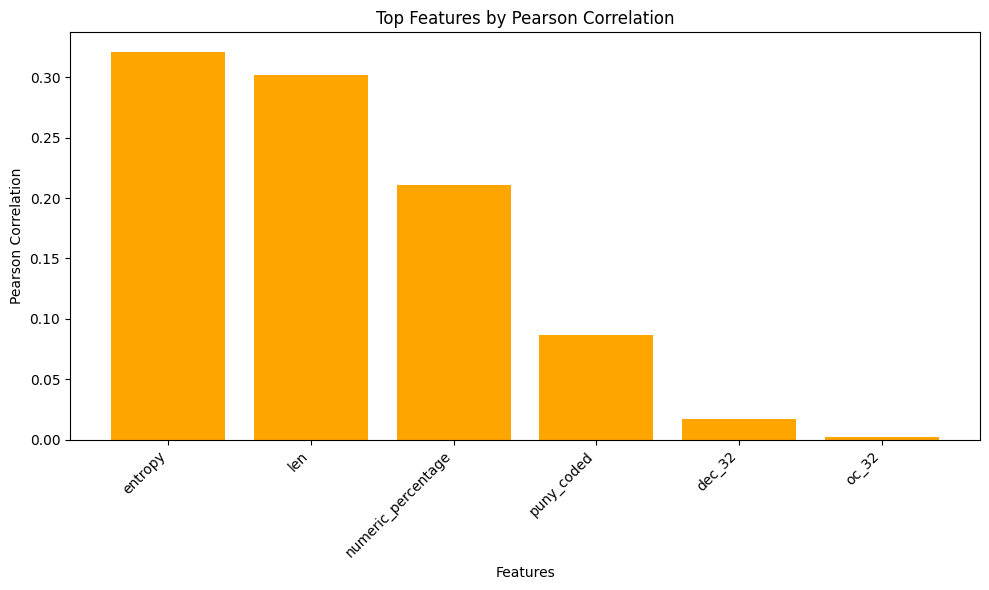

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def calculate_pearson_correlation(data):
     # Convertir les étiquettes de classe en valeurs numériques
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(data['Class'])

    # Calculer le coefficient de corrélation de Pearson entre chaque caractéristique et la classe
    pearson_correlation = data.iloc[:, :-1].apply(lambda feature: np.abs(np.corrcoef(pd.to_numeric(feature, errors='coerce'), labels_encoded)[0, 1]))

    return pearson_correlation

def select_top_features_pearson_correlation(data, top_n=10):
    pearson_correlation = calculate_pearson_correlation(data)
    top_features = pearson_correlation.nlargest(top_n).index.tolist()
    top_features_correlation = pearson_correlation[top_features]

    return top_features, top_features_correlation

def plot_top_features_pearson_correlation(top_features, top_features_correlation):
    plt.figure(figsize=(10, 6))
    colors = ['orange' if correlation > 0 else 'red' for correlation in top_features_correlation]  # Couleur spéciale pour les coefficients de corrélation
    plt.bar(top_features, top_features_correlation, color=colors)
    plt.xlabel('Features')
    plt.ylabel('Pearson Correlation')
    plt.title('Top Features by Pearson Correlation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Chargement des données à partir de votre DataFrame
# data = pd.read_csv("je charge_deja _les_donnees_depuis_gain_information.csv")


# Sélectionner les 10 meilleures caractéristiques avec la corrélation de Pearson
top_features, top_features_correlation = select_top_features_pearson_correlation(data)

# Afficher les noms et les coefficients de corrélation de Pearson des 10 meilleures caractéristiques
print("Top 10 Features by Pearson Correlation:")
for feature, correlation in zip(top_features, top_features_correlation):
    print(f"Feature: {feature}, Pearson Correlation: {correlation}")

# Tracer les 10 meilleures caractéristiques avec la corrélation de Pearson
plot_top_features_pearson_correlation(top_features, top_features_correlation)
